In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif', weight='ultralight')
rc('figure', facecolor='w')
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import os, math
import apogee_tools as ap

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [78]:
pairs = pd.read_csv('xmatch/apogee_all_gaia_pairs.csv')

In [79]:
pairs = pairs[pairs['pair_plx'] > .8]
pairs = pairs[pairs['plx']/pairs['plx_err'] > 20]
pairs = pairs[pairs['pair_plx']/pairs['pair_plx_err'] > 20]
pairs = pairs[np.sqrt(pairs['pmra_err']**2 + pairs['pmdec_err']**2) < 6]
pairs = pairs[np.sqrt(pairs['pair_pmra_err']**2 + pairs['pair_pmdec_err']**2) < 6]
pairs['cpm_crit'] = (pairs['pmra'] - pairs['pair_pmra'])**2 / (pairs['pmra_err']**2 + pairs['pair_pmra_err']**2) + \
    (pairs['pmdec'] - pairs['pair_pmdec'])**2 / (pairs['pmdec_err']**2 + pairs['pair_pmdec_err']**2)
len(pairs)

34197

In [85]:
cpm = pairs[pairs['cpm_crit'] < 25][pairs['cpm_crit'] > 10**-6]
cpm['pair_dist'] = 1/cpm['pair_plx']
cpm['pair_bp_rp'] = cpm['pair_bp'] - cpm['pair_rp']
cpm['pair_g_abs'] = cpm['pair_g'] + 5*np.log10(cpm['pair_plx'])-10

c = coord.ICRS(ra=np.array(cpm['pair_ra']) * u.degree, dec=np.array(cpm['pair_dec']) * u.degree, distance=np.array(cpm['pair_dist']) * u.kpc)
gc_coord = c.transform_to(coord.Galactocentric) 
cpm['pair_x'] = np.array(gc_coord.x)
cpm['pair_y'] = np.array(gc_coord.y)
cpm['pair_z'] = np.array(gc_coord.z)

cpm

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,bp_rp,chi,dec,dist,fe_h,gaia_id,g_abs,h,id,j,...,pair_pmra_err,pair_pmdec_err,pairdistance,cpm_crit,pair_dist,pair_bp_rp,pair_g_abs,pair_x,pair_y,pair_z
14890,1.775526,39110.384103,57.810648,0.266276,0.009968,3445808766449470464,7.750785,12.141,2M04493641+5748385,12.794,...,0.120961,0.095751,0.007139,24.187390,0.267221,2.508673,9.053792,-8.530121,0.129832,0.066680
15260,2.185885,19483.657424,18.535343,0.127307,-0.248855,3951211277703834368,9.586972,12.053,2M11530499+1832069,12.647,...,0.319714,0.565492,0.004216,2.412963,0.126354,2.714554,11.635165,-8.315579,-0.030780,0.148547
16584,2.260896,42248.344607,-10.603914,0.164902,0.202738,225498363003999232,9.008728,11.913,2M03544831-1036144,12.594,...,0.485411,0.436211,0.001036,3.553882,0.155292,3.103101,12.723775,-8.404750,-0.040180,-0.080329
16591,2.116016,22802.818815,27.495986,0.382573,-0.084354,694163746935187840,8.849047,13.760,2M09224810+2729455,14.365,...,0.134738,0.099825,0.002031,4.874677,0.403901,2.279942,8.584050,-8.572246,-0.098644,0.308539
19652,2.078475,49597.430951,-2.681240,0.287589,0.379343,1332623662122964608,8.280809,12.406,2M16483432-0240520,13.121,...,0.180344,0.127167,0.002446,5.841993,0.300509,2.965229,9.942501,-8.038130,0.071116,0.156211
20642,2.619761,23084.030898,36.670325,0.100151,-0.094296,933568458124927232,10.664955,12.311,2M09504782+3640138,12.887,...,0.166951,0.164984,0.002708,1.384124,0.095325,0.090693,12.097553,-8.359399,-0.007587,0.101135
21382,2.201628,54082.776686,46.862851,0.130961,-0.007063,3889148862837424512,8.465982,10.952,2M10083833+4651473,11.585,...,0.340126,0.687876,0.000888,6.304378,0.125512,0.736672,12.906174,-8.374786,0.013093,0.126912
23644,2.233315,30756.193033,56.710996,0.119503,-0.256517,4111019451704304000,9.317182,11.442,2M17254769+5642368,12.007,...,0.174374,0.117135,0.000280,6.716169,0.125261,NaN,10.799616,-8.290447,0.103406,0.097051
24212,1.599790,51877.553638,42.659627,0.580254,-0.229247,1472491024463039104,7.501512,13.729,2M12522001+4239346,14.426,...,0.030915,0.035387,0.002342,5.954008,0.570263,1.029177,5.828473,-8.379809,0.129030,0.576704
24219,1.888698,70423.153499,0.087008,0.181434,-0.045060,839265201237783296,8.138227,11.593,2M12195174+0005141,12.231,...,0.109448,0.060151,0.004155,6.187634,0.182682,2.236072,9.121381,-8.275755,-0.082688,0.188089


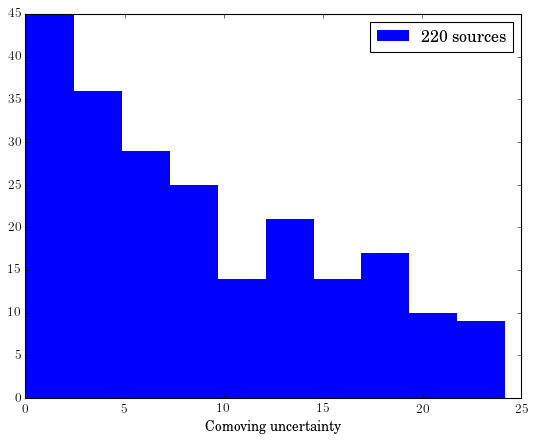

In [73]:
plt.hist(cpm['cpm_crit'], edgecolor='none', label=str(len(cpm))+' sources')
plt.xlabel('Comoving uncertainty')
plt.legend(loc='upper right')
plt.show()

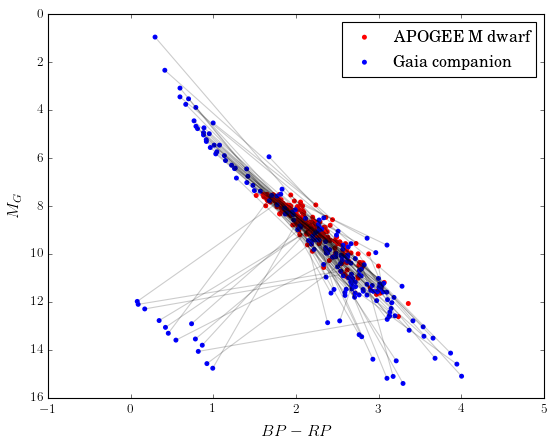

In [96]:
plt.scatter(cpm['bp_rp'], cpm['g_abs'], color='r', edgecolor='none', label='APOGEE M dwarf')
plt.scatter(cpm['pair_bp_rp'], cpm['pair_g_abs'], color='b', edgecolor='none', label='Gaia companion')
for i in list(cpm.index):
    plt.plot([cpm['bp_rp'][i], cpm['pair_bp_rp'][i]], [cpm['g_abs'][i], cpm['pair_g_abs'][i]], 'k', alpha=.2, linewidth=1)
plt.ylim(16,0)
plt.xlabel(r'$BP-RP$', fontsize=15)
plt.ylabel(r'$M_G$', fontsize=15)
plt.legend(loc='upper right', scatterpoints=1)
plt.show()

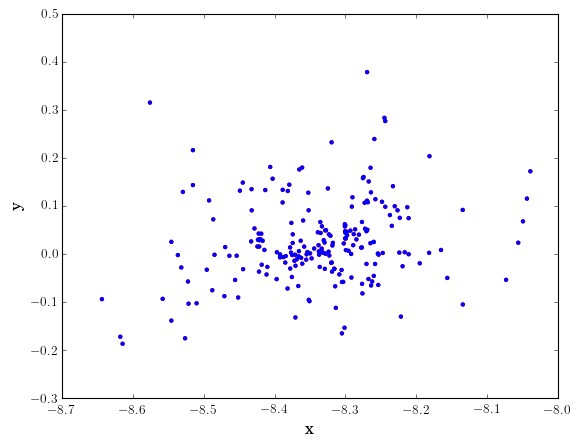

In [95]:
# plt.figure(figsize=[10,10])
plt.scatter(cpm['x'], cpm['y'], color='r', edgecolor='none', s=15)
plt.scatter(cpm['x'], cpm['y'], color='b', edgecolor='none', s=15)
for i in list(cpm.index):
    plt.plot([cpm['x'][i], cpm['x'][i]], [cpm['y'][i], cpm['y'][i]], 'k', alpha=.2, linewidth=1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()

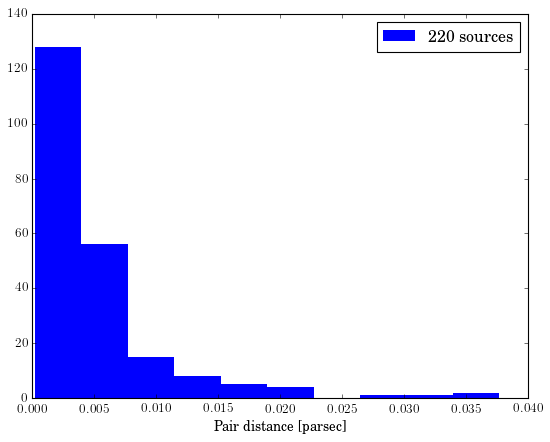

In [99]:
plt.hist(cpm['pairdistance'], edgecolor='none', label=str(len(cpm))+' sources')
plt.xlabel('Pair distance [parsec]')
plt.legend(loc='upper right')
plt.show()

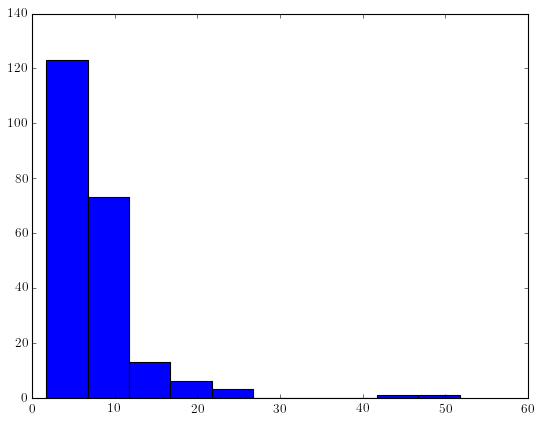

In [107]:
plt.hist(cpm['plx'])
plt.show()

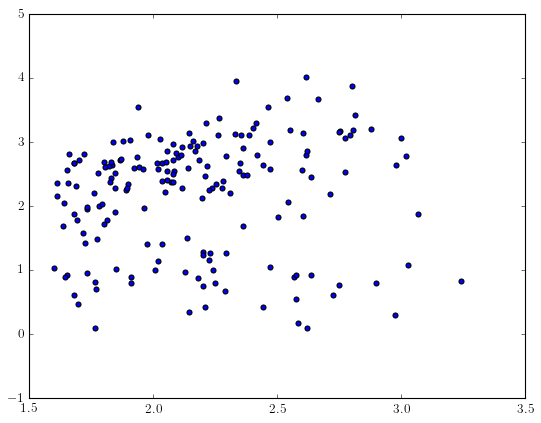

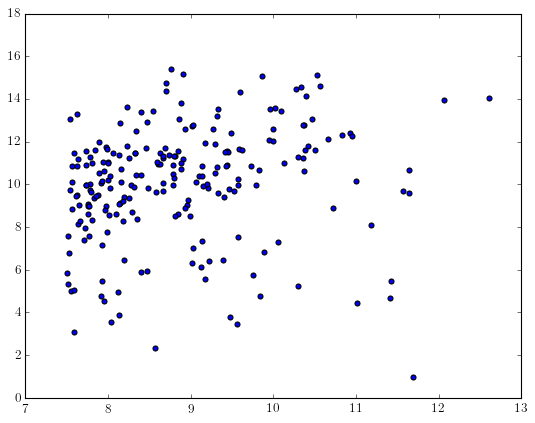

In [74]:
plt.scatter(cpm['bp_rp'], cpm['pair_bp_rp'])
plt.show()
plt.scatter(cpm['g_abs'], cpm['pair_g_abs'])
plt.show()

In [109]:
cpm.to_csv('found_pairs/apogee_all_gaia_pairs.csv')

In [54]:
cpm.keys()

Index(['bp_rp', 'chi', 'dec', 'dist', 'fe_h', 'gaia_id', 'g_abs', 'h', 'id',
       'j', 'k', 'plx', 'plx_err', 'pmdec', 'pmdec_err', 'pmra', 'pmra_err',
       'ra', 'rv', 'rv_err', 'teff', 'x', 'y', 'z', 'pair_id', 'pair_plx',
       'pair_plx_err', 'pair_g', 'pair_bp', 'pair_rp', 'pair_pmra',
       'pair_pmdec', 'pair_pmra_err', 'pair_pmdec_err', 'pairdistance',
       'cpm_crit', 'pair_dist', 'pair_bp_rp', 'pair_g_abs'],
      dtype='object')

220